In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.engine.sequential import Sequential
from tensorflow.keras import layers

In [2]:
(x_train ,y_train),(x_test ,y_test) =keras.datasets.cifar100.load_data()#define the train data and test data as x and y

In [3]:
type(x_train)#checking the type of data to know the opertions can be done on it 

numpy.ndarray

In [4]:
print (x_train.shape, y_train.shape) #knowing the shape of the data 
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
x_train.dtype,y_train.dtype,x_test.dtype,y_test.dtype #checking the types

(dtype('uint8'), dtype('int32'), dtype('uint8'), dtype('int32'))

In [6]:
print(x_train)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [9]:
data=np.append(x_train.reshape((50000,-1)),y_train,axis=1)#reshape the data of x_train and add y_train for it in augumented matrix as a lable
train,val =train_test_split(data,test_size=.2,random_state=42)#split the data to train and validation one with percentage .2
test = np.append(x_test.reshape((10000,-1)),y_test,axis=1)#reshape the data of x_test and add y_test for it in augumented matrix as a lable
print("train dataset",train[:,:-1].shape,train[:,-1].shape)
print("validation dataset",val[:,:-1].shape,val[:,-1].shape)
print("test ataset",test[:,:-1].shape,test[:,-1].shape)

train dataset (40000, 3072) (40000,)
validation dataset (10000, 3072) (10000,)
test ataset (10000, 3072) (10000,)


logistic Regression
appling this model is not so accurate as the accuracy achieved is 16% only which is so small so we need to use deep leaning to get high accuracy

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression(random_state=0)#applying logistic regression model on the data 
clf=clf.fit(train[:,:-1],train[:,-1])#fitting the train data with the last colum in it (label)
y_predict=clf.predict(val[:,:-1]) #assigine the validation data to y_predict 
print ("validation accuracy",accuracy_score(val[:,-1],y_predict)) #check the accuracy between val labels and y_predict

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


validation accuracy 0.1694


Creating another model to fit the data and calculate the accuracy

In [11]:
from keras.applications.inception_v3 import InceptionV3 
from keras.engine.sequential import Sequential
inputshape=[train[i,:-1].shape[0]]#choose the input dta as assiginng the train data to the input one 
print(inputshape)
classes_num=100 #class number which refere to the model we work on cifa_100
model=Sequential() #choose the model and call sequential fn to make the model in sequence 
#starting to build our model layer by layer 
model.add(layers.InputLayer(input_shape = inputshape)) #the input layer 
model.add(layers.Dense(300, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="layer1"))#build the first layer as we chhose it is shape  and the activation fn is relu also choose the initializer we will work with then he layer name
model.add(layers.Dense(250, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="layer2"))#build the first layer as we chhose it is shape  and the activation fn is relu also choose the initializer we will work with then he layer name
model.add(layers.Dense(200, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="layer3"))#build the first layer as we chhose it is shape  and the activation fm is relu also choose the initializer we will work with then he layer name
model.add(layers.Dense(100, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="layer4"))#build the first layer as we chhose it is shape  and the activation fn is relu also choose the initializer we will work with then he layer name
model.add(layers.Dense(50, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(), name="layer5"))#build the first layer as we chhose it is shape  and the activation fn is relu also choose the initializer we will work with then he layer name
model.add(layers.Dense(classes_num, activation="softmax" , kernel_initializer=tf.keras.initializers.HeNormal(), name="output_layer")) #the output layer with activation fn caled softmax and shape as class number
model.summary()#getting the model as layers and output shape and number of prameters in every layer

[3072]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 300)               921900    
                                                                 
 layer2 (Dense)              (None, 250)               75250     
                                                                 
 layer3 (Dense)              (None, 200)               50200     
                                                                 
 layer4 (Dense)              (None, 100)               20100     
                                                                 
 layer5 (Dense)              (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 100)               5100      
                                                                 
Total params: 1,077,600
Trainable params: 1,077,6

66


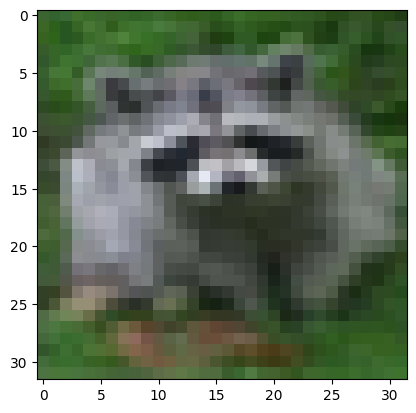

In [12]:
i=450
plt.imshow(train[i,:-1].reshape(32,32,3).astype('uint8'))
print(train[i,-1])

In [13]:
sample_tensor = tf.convert_to_tensor((train[i,:-1]).reshape(1, 3072))#to apply the model we created to the data we need to convert it from array to tensor type with a new shape 
sample_tensor

<tf.Tensor: shape=(1, 3072), dtype=int32, numpy=array([[ 60, 100,  48, ...,  61, 115,  45]])>

In [14]:
y = model(sample_tensor) #assigne sample_tensor to y 
y

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.1501187e-24, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00

In [15]:
max_neuron = tf.math.argmax(y[0]) #applying the model created on y  
print(max_neuron)
print(max_neuron.numpy())

tf.Tensor(32, shape=(), dtype=int64)
32


In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), #here we optimize the model we created by using adam optimizer which give high accuracy
   loss=keras.losses.SparseCategoricalCrossentropy(),# the losses needed to be minimise by using this fn 
    metrics=[keras.metrics.SparseCategoricalAccuracy()],#the metrics will bw monitored by using this fn 
)

In [17]:
results = model.evaluate(test[:,:-1], test[:,-1], batch_size=128)#evaluating the model by using test data and labels in the test data

79/79 [==============================] - 1s 9ms/step - loss: 434.1206 - sparse_categorical_accuracy: 0.0113


In [18]:
history=model.fit(train[:,:-1],train[:,-1],epochs=50,batch_size=400,validation_data=(val[:,:-1],val[:,-1]),)#fiting the training data with the label one and also validation data with label one the epochs refer to the numbers of time we will pass on every element in the data 

Epoch 1/50
100/100 [==============================] - 4s 33ms/step - loss: 34.4008 - sparse_categorical_accuracy: 0.0107 - val_loss: 4.9728 - val_sparse_categorical_accuracy: 0.0095
Epoch 2/50
100/100 [==============================] - 3s 33ms/step - loss: 4.7769 - sparse_categorical_accuracy: 0.0100 - val_loss: 4.7217 - val_sparse_categorical_accuracy: 0.0097
Epoch 3/50
100/100 [==============================] - 4s 35ms/step - loss: 4.6629 - sparse_categorical_accuracy: 0.0100 - val_loss: 4.6710 - val_sparse_categorical_accuracy: 0.0098
Epoch 4/50
100/100 [==============================] - 4s 38ms/step - loss: 4.6318 - sparse_categorical_accuracy: 0.0092 - val_loss: 4.6494 - val_sparse_categorical_accuracy: 0.0094
Epoch 5/50
100/100 [==============================] - 4s 37ms/step - loss: 4.6184 - sparse_categorical_accuracy: 0.0094 - val_loss: 4.6392 - val_sparse_categorical_accuracy: 0.0084
Epoch 6/50
100/100 [==============================] - 4s 39ms/step - loss: 4.6114 - sparse_cat

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


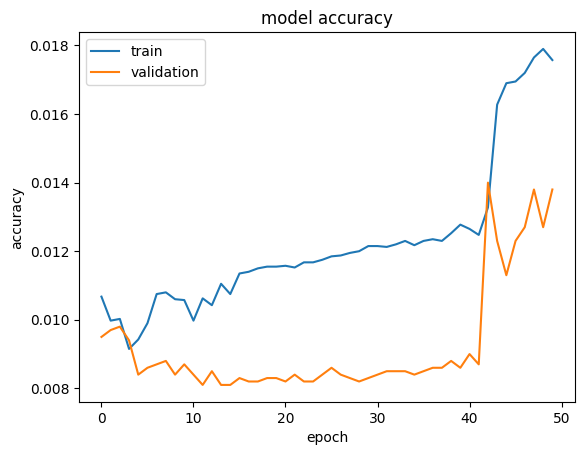

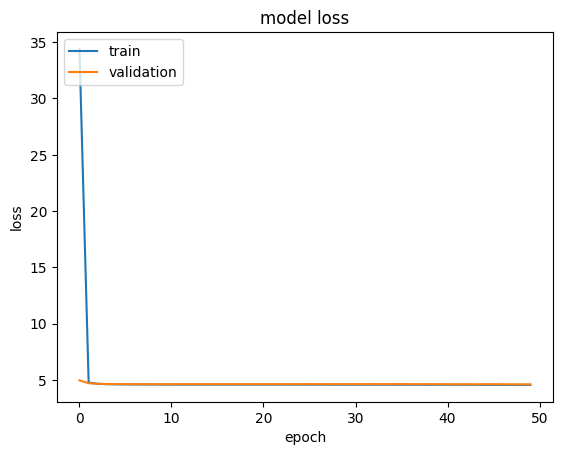

In [19]:
print(history.history.keys())
#here we want to show the accuracy in a graphical way 
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#here we want to show the losses in a graphical way
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
results = model.evaluate(test[:,:-1], test[:,-1], batch_size=128)#evaluating the model to know the accuracy of it by evalute the tasting data

79/79 [==============================] - 1s 9ms/step - loss: 4.6106 - sparse_categorical_accuracy: 0.0143


optimized model
because the model accuracy was not good so we need to optimize this model by using another model which is more accurate in image processing which is CNN(Convolutional Neural Network)

In [21]:
inputShape=(32,32,3)# reshape the input data to apply the model on it 
print("our input shape",inputShape)
#creating another model 
cnn_model = Sequential()#using sequential fn to make the model in a sequence
#creating the layers of the model one by one 
cnn_model.add(layers.InputLayer(input_shape = inputShape))#creating he input layer 
cnn_model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu'))#creating a convolution layer with filter (3,3),padding type same argument and activation fn relu
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer 
cnn_model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu')) #creating another convolution layer
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))#creating a pooling operation
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))#creating a convolution layer with filter (3,3),padding type same argument and activation fn relu
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer
cnn_model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))#creating another convolution layer
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))#creating a pooling operation
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))#creating a convolution layer with filter (3,3),padding type same argument and activation fn relu
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer
cnn_model.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))#creating another convolution layer
cnn_model.add(layers.BatchNormalization())#creating a BatchNormalization layer
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))#creating a pooling operation
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Flatten())#flatting layer to but the output in a vector matrix
cnn_model.add(layers.Dense(128, activation='relu'))#using dense to fully connected layer and output layer with each other
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(100, activation='softmax'))#using dense to fully connected layer and output layer with each other and using activation fn softmax
cnn_model.summary() #getting the model as layers and output shape and number of prameters in every layer

our input shape (32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                          

In [22]:
train_x_reshaped = train[:,:-1].reshape(-1, 32, 32, 3)#reshape the training data to apply the model on it 
val_x_reshaped = val[:,:-1].reshape(-1, 32, 32, 3)#reshape the validation data to apply the model on it 
test_x_reshaped = test[:,:-1].reshape(-1, 32, 32, 3)#reshape the test data to apply the model on it 

66


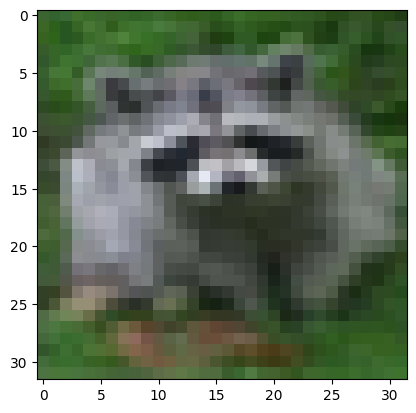

In [23]:
i=450
plt.imshow(train[i,:-1].reshape(32,32,3).astype('uint8'))
print(train[i,-1])

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


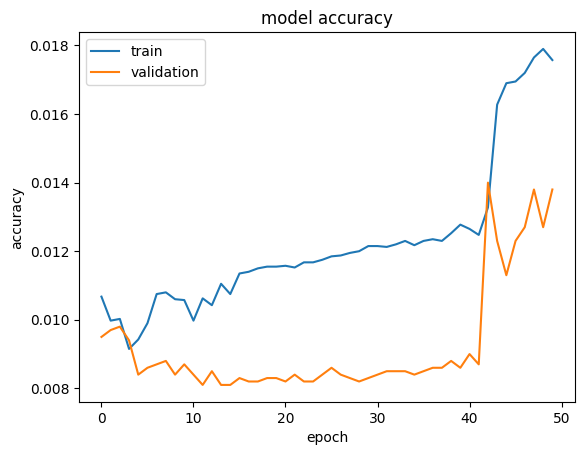

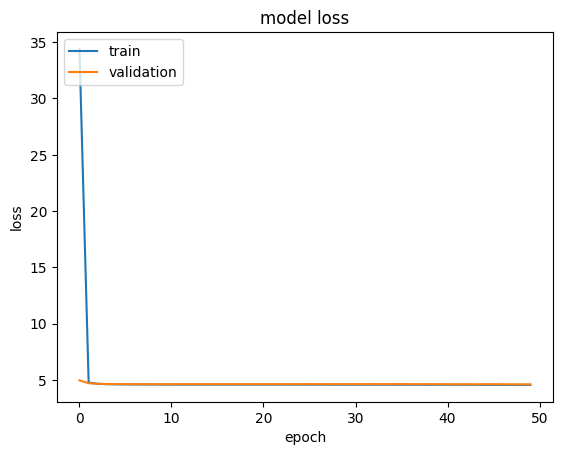

In [24]:
print(history.history.keys())
#here we want to show the accuracy in a graphical way 
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#here we want to show the losses in a graphical way
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
results = model.evaluate(test[:,:-1], test[:,-1], batch_size=128)#evaluating the model to know the accuracy of it by evalute the tasting data

79/79 [==============================] - 1s 9ms/step - loss: 4.6106 - sparse_categorical_accuracy: 0.0143


In [26]:
x = tf.convert_to_tensor((train[i,:-1]).reshape(1, 32, 32, 3))#convert the taining data from array to tensor and reshape it so we can apply the model on it
y = cnn_model(x)
max_neuron = tf.math.argmax(y[0])#apply the model in the data
print(y)
print(max_neuron)
print(max_neuron.numpy())

tf.Tensor(
[[8.1021374e-04 2.2104712e-06 5.1399827e-05 5.6607224e-04 1.6712317e-04
  1.6990851e-04 2.6515615e-04 7.9417453e-07 6.6069560e-06 7.2871958e-06
  7.0471346e-02 3.2224493e-06 1.4208876e-04 1.4974768e-03 9.9468225e-06
  1.7286808e-05 9.8172968e-06 5.1678199e-04 1.3531105e-02 2.4451384e-02
  1.0216673e-03 2.1998944e-04 7.2568437e-05 5.9094691e-07 1.2449184e-02
  5.3426931e-05 1.4097607e-07 1.4973081e-06 2.5542313e-04 1.5720308e-06
  1.6627083e-02 2.6540433e-03 1.1036442e-05 5.2738760e-04 4.5761060e-02
  4.1712853e-03 1.2740908e-06 4.1692722e-08 1.5782288e-06 2.6770516e-03
  2.4871551e-04 1.9211010e-03 1.2935164e-03 1.6282557e-04 1.5892742e-04
  1.7980262e-04 1.4811638e-03 5.4745364e-05 1.0939576e-03 1.7756902e-05
  9.3153549e-06 1.5255112e-03 2.7405084e-03 5.1802811e-03 9.7826385e-05
  5.4399949e-04 2.3945875e-04 1.2606303e-02 5.6953275e-01 3.9782319e-03
  1.3908714e-03 3.1264266e-05 5.6338242e-05 8.7660821e-03 4.5263590e-04
  8.7295784e-06 1.0040537e-03 2.6164958e-04 1.2435865

In [27]:
cnn_model.compile(
    optimizer=keras.optimizers.Adam(),  #here we optimize the model we created by using adam optimizer which give high accuracy
    loss=keras.losses.SparseCategoricalCrossentropy(),# the losses needed to be minimise by using this fn  
    metrics=[keras.metrics.SparseCategoricalAccuracy()],#the metrics will bw monitored by using this fn 
)

In [28]:
print("Fit model on training data")
history = cnn_model.fit(train_x_reshaped,train[:,-1],batch_size=64,epochs=40,validation_data=(val_x_reshaped, val[:,-1]),)#fiting the training data with the label one and also validation data with label one the epochs refer to the numbers of time we will pass on every element in the data 

Fit model on training data
Epoch 1/40
625/625 [==============================] - 235s 372ms/step - loss: 4.2877 - sparse_categorical_accuracy: 0.0701 - val_loss: 3.7470 - val_sparse_categorical_accuracy: 0.1380
Epoch 2/40
625/625 [==============================] - 241s 386ms/step - loss: 3.5716 - sparse_categorical_accuracy: 0.1506 - val_loss: 3.2664 - val_sparse_categorical_accuracy: 0.2168
Epoch 3/40
625/625 [==============================] - 206s 330ms/step - loss: 3.2442 - sparse_categorical_accuracy: 0.2101 - val_loss: 2.9269 - val_sparse_categorical_accuracy: 0.2687
Epoch 4/40
625/625 [==============================] - 172s 276ms/step - loss: 2.9925 - sparse_categorical_accuracy: 0.2542 - val_loss: 2.7257 - val_sparse_categorical_accuracy: 0.3086
Epoch 5/40
625/625 [==============================] - 174s 279ms/step - loss: 2.7910 - sparse_categorical_accuracy: 0.2925 - val_loss: 2.4493 - val_sparse_categorical_accuracy: 0.3619
Epoch 6/40
625/625 [==============================] -

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


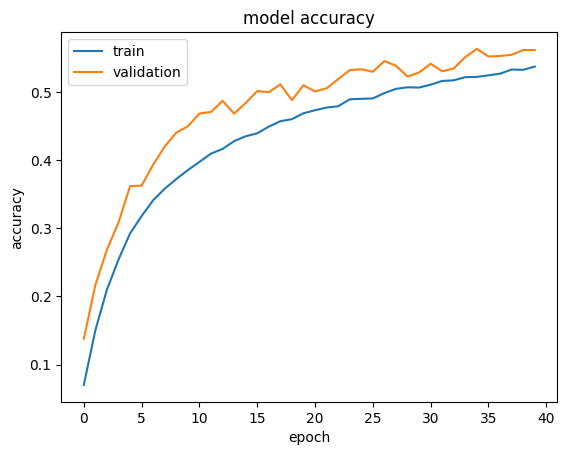

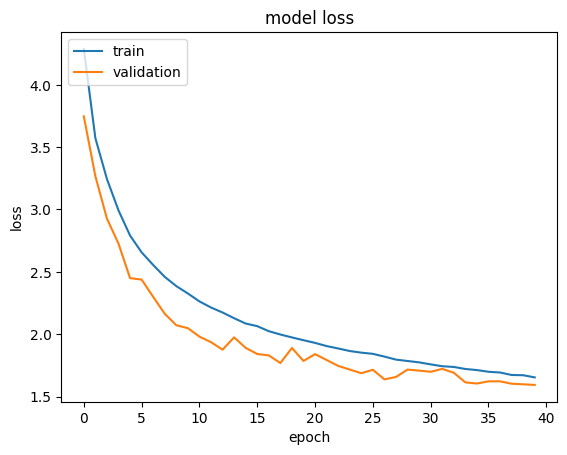

In [29]:
print(history.history.keys())
#here we want to show the accuracy in a graphical way 
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#here we want to show the losses in a graphical way
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
results = cnn_model.evaluate(test_x_reshaped, test[:,-1], batch_size=128)#evaluating the model to know the accuracy of it by evalute the tasting data

79/79 [==============================] - 23s 286ms/step - loss: 1.5626 - sparse_categorical_accuracy: 0.5611


Transfare model
because the accuracy is not so good so we need to transfare some layers in the model to make it better 

In [31]:
layer=keras.layers.GlobalAveragePooling2D()
layer = keras.layers.Dense(100)
layer.build((None, 4))  # Create the weights
print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0


In [32]:
CNN_model = keras.applications.ResNet50( #start choosing the model to work with
    weights='imagenet',  
    input_shape=(32, 32, 3),
    include_top=False)

In [33]:
CNN_model.trainable = False #freezing the old model

In [34]:
#new model
cnn_model = Sequential()
tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    classifier_activation="softmax",
)

In [35]:
CNN_model.compile(optimizer=keras.optimizers.Adam(),#here we optimize the model we created by using adam optimizer which give high accuracy
              loss=keras.losses.BinaryCrossentropy(from_logits=True),# the losses needed to be minimise by using this fn
              metrics=[keras.metrics.BinaryAccuracy()]) #the metrics will bw monitored by using this fn    

In [36]:
new_fit = CNN_model.fit(train_x_reshaped,train [:,-1],batch_size=32,epochs=20,validation_data=(val_x_reshaped, val[:,-1]),)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1146, in step_function  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1135, in run_step  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 994, in train_step
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1052, in compute_loss
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\compile_utils.py", line 265, in __call__
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 152, in __call__
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 272, in call  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 2162, in binary_crossentropy
        
    File "c:\Users\DELL\Desktop\Task2\keras\backend.py", line 5677, in binary_crossentropy
        

    ValueError: `logits` and `labels` must have the same shape, received ((32, 1, 1, 2048) vs (32,)).


In [37]:
results = CNN_model.evaluate(test_x_reshaped, test[:,-1], batch_size=128)

ValueError: in user code:

    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1713, in step_function  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1701, in run_step  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1667, in test_step
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\training.py", line 1052, in compute_loss
        
    File "c:\Users\DELL\Desktop\Task2\keras\engine\compile_utils.py", line 265, in __call__
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 152, in __call__
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 272, in call  **
        
    File "c:\Users\DELL\Desktop\Task2\keras\losses.py", line 2162, in binary_crossentropy
        
    File "c:\Users\DELL\Desktop\Task2\keras\backend.py", line 5677, in binary_crossentropy
        

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1, 1, 2048) vs (None,)).
